In [5]:
%matplotlib inline
import pandas as pd

In [6]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [7]:
titles = pd.read_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Wedding Rehearsal,1932
1,"Anna, sestra Jany",1976
2,Lee Sangui nalgae,1968
3,Wimbledon: Official Film 2000,2000
4,Hard to Get,2014


In [8]:
cast = pd.read_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [9]:
cast_temp=cast[(cast.character=='Superman') | (cast.character=='Batman')]
cast_temp.head()

,title,year,name,type,character,n
1087,Batman Fights Dracula,1967,Jing Abalos,actor,Batman,1.0
16706,Batman v Superman: Dawn of Justice,2016,Ben Affleck,actor,Batman,1.0
16732,Justice League,2017,Ben Affleck,actor,Batman,NaN
16747,Suicide Squad,2016,Ben Affleck,actor,Batman,NaN
48373,Atom Man vs. Superman,1950,Kirk Alyn,actor,Superman,1.0


In [19]:
df_unstack=series_temp.unstack()
df_unstack=df_unstack.fillna(0)
series_diff=df_unstack.Superman-df_unstack.Batman
len(series_diff[series_diff>0])

11

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [20]:
series_temp=cast_temp.groupby(['year','character']).size()
df_unstack=series_temp.unstack()
df_unstack=df_unstack.fillna(0)
series_diff=df_unstack.Batman-df_unstack.Superman
len(series_diff[series_diff>0])

27

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

In [71]:
%matplotlib inline

In [70]:
cast_group=cast.groupby(['year','type']).size()
cast_group.unstack().fillna(0).head()

type,actor,actress
year,,
1894,2.0,1.0
1900,2.0,0.0
1905,1.0,0.0
1906,14.0,3.0
1907,5.0,0.0


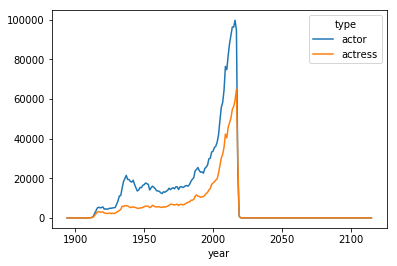

In [77]:
df=cast_group.unstack().fillna(0)
df.plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

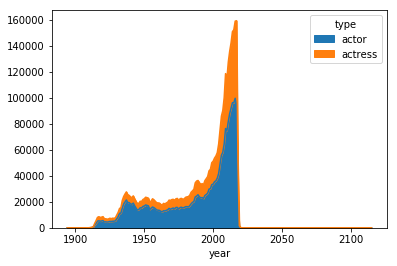

In [78]:
df=cast_group.unstack().fillna(0)
df.plot(kind='area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

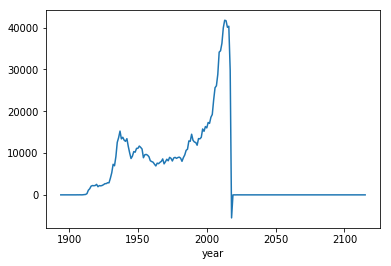

In [80]:
(df.actor-df.actress).plot()

### Plot the fraction of roles that have been 'actor' roles each year in the history of film.

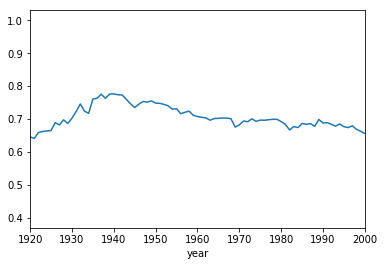

In [86]:
df['total']=df.actor+df.actress
df['fraction_actor']=df.actor/df.total
df.fraction_actor.plot(xlim=[1920,2000])

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

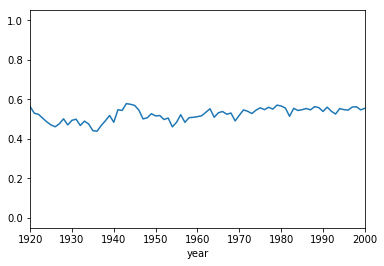

In [122]:
df_temp=cast[cast.n==2].groupby(['year','type']).size().unstack().fillna(0)
df_temp['total']=df_temp.actor+df_temp.actress
(df_temp.actor/df_temp.total).plot(xlim=[1920,2000])

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

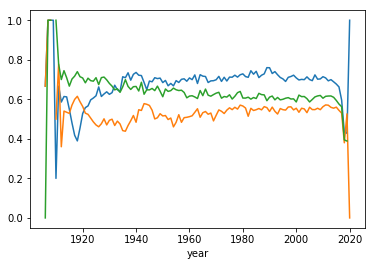

In [141]:
df_temp=cast[cast.n<=3].groupby(['year','type','n']).size().unstack(1).unstack().fillna(0)
for i in [1,2,3]:
    ((df_temp['actor'][i])/(df_temp['actor'][i]+df_temp['actress'][i])).plot()
#df_temp['total']=df_temp.actor+df_temp.actress
#(df_temp.actor/df_temp.total).plot(xlim=[1920,2000])

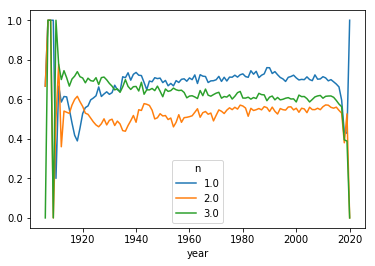

In [151]:
# vectorized-
((df_temp['actor'])/(df_temp['actor']+df_temp['actress'])).fillna(0).plot()

In [149]:
df_temp.head()

type actor           actress          
n      1.0  2.0  3.0     1.0  2.0  3.0
year                                  
1906   2.0  2.0  0.0     1.0  1.0  1.0
1907   1.0  1.0  1.0     0.0  0.0  0.0
1908   1.0  2.0  2.0     0.0  0.0  0.0
1909   1.0  0.0  0.0     0.0  0.0  0.0
1910   1.0  2.0  3.0     4.0  2.0  0.0

In [152]:
((df_temp['actor'])/(df_temp['actor']+df_temp['actress'])).fillna(0).head()

n,1.0,2.0,3.0
year,,,
1906,0.666667,0.666667,0.0
1907,1.000000,1.000000,1.0
1908,1.000000,1.000000,1.0
1909,1.000000,0.000000,0.0
1910,0.200000,0.500000,1.0
